### 1. Descriptive Statistics

#### 1.1 Headline Length Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
# Load data (use chunksize for large files)
df = pd.read_csv('./../data/raw_analyst_ratings.csv')


In [34]:
# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()
df['headline_word_count'] = df['headline'].str.split().str.len()

In [35]:
# Basic statistics
print("Headline Length Statistics:")
print(df['headline_length'].describe())
print("\nHeadline Word Count Statistics:")
print(df['headline_word_count'].describe())

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Headline Word Count Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_word_count, dtype: float64


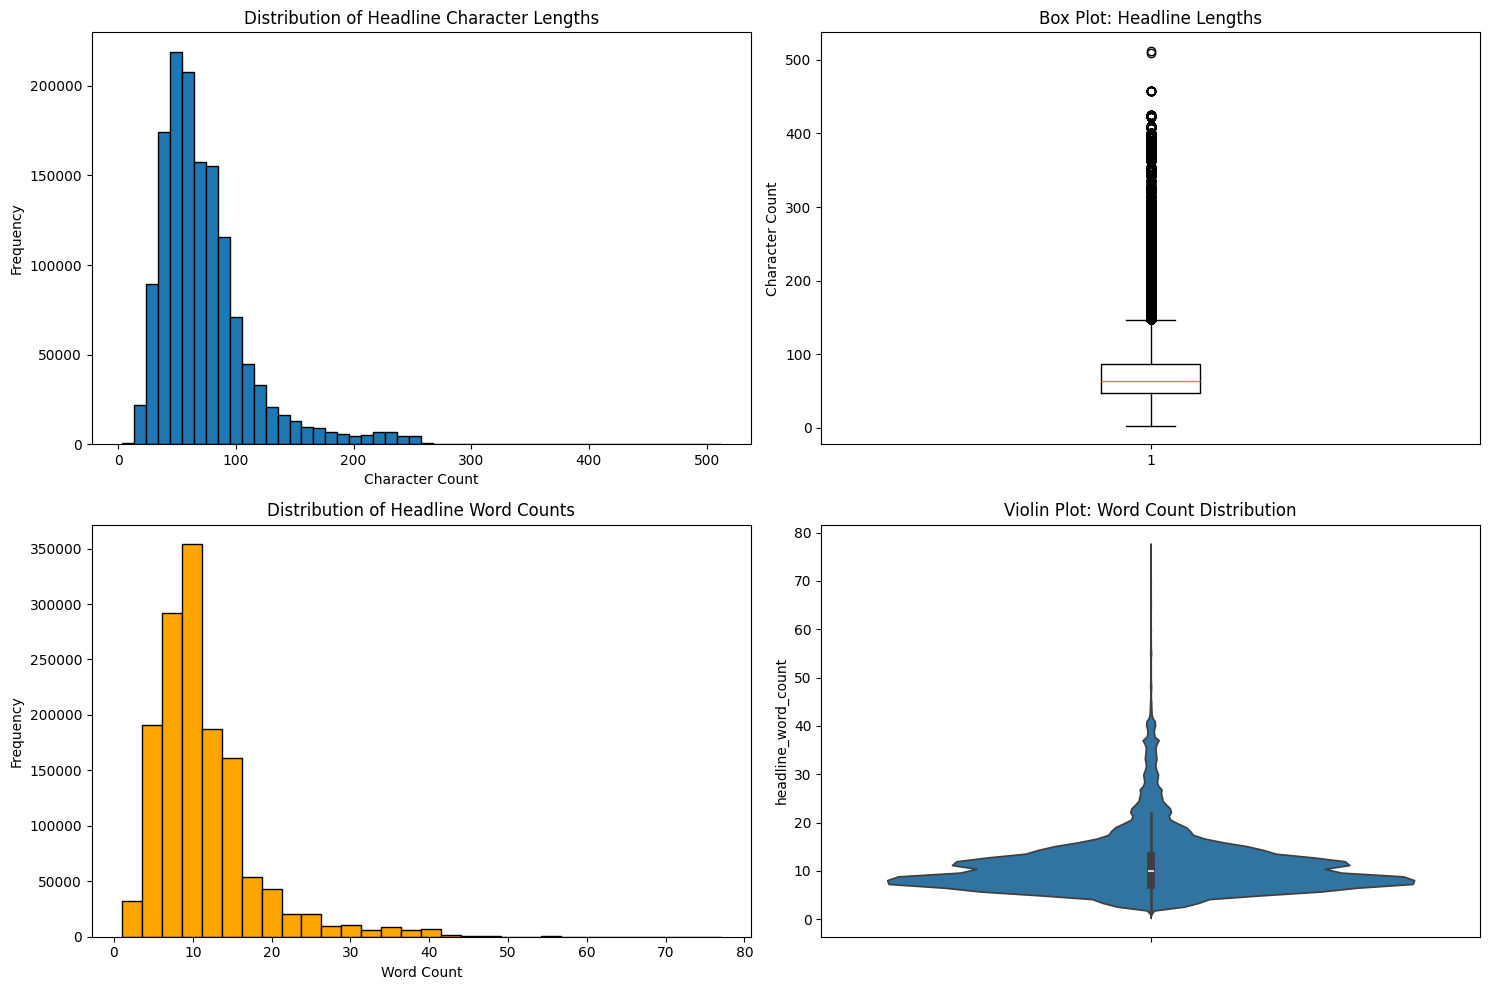

In [36]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of headline lengths
axes[0, 0].hist(df['headline_length'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Headline Character Lengths')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(df['headline_length'])
axes[0, 1].set_title('Box Plot: Headline Lengths')
axes[0, 1].set_ylabel('Character Count')

# Word count distribution
axes[1, 0].hist(df['headline_word_count'], bins=30, edgecolor='black', color='orange')
axes[1, 0].set_title('Distribution of Headline Word Counts')
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')

# Violin plot for word count
sns.violinplot(y=df['headline_word_count'], ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot: Word Count Distribution')

plt.tight_layout()
plt.show()


### Answers to Key Questions


In [37]:
# Question 1: What is the typical headline length?
print("="*80)
print("QUESTION 1: What is the typical headline length?")
print("="*80)
print(f"\nBased on the analysis of {len(df):,} headlines:")
print(f"  • Mean (Average): {df['headline_length'].mean():.1f} characters")
print(f"  • Median (50th percentile): {df['headline_length'].median():.1f} characters")
print(f"  • Most common range: {df['headline_length'].quantile(0.25):.0f} - {df['headline_length'].quantile(0.75):.0f} characters (25th to 75th percentile)")
print(f"\nIn terms of word count:")
print(f"  • Mean: {df['headline_word_count'].mean():.1f} words")
print(f"  • Median: {df['headline_word_count'].median():.0f} words")
print(f"  • Most common range: {df['headline_word_count'].quantile(0.25):.0f} - {df['headline_word_count'].quantile(0.75):.0f} words")
print(f"\nCONCLUSION: The typical headline is approximately {df['headline_length'].median():.0f} characters long, which translates to about {df['headline_word_count'].median():.0f} words.")


QUESTION 1: What is the typical headline length?

Based on the analysis of 1,407,328 headlines:
  • Mean (Average): 73.1 characters
  • Median (50th percentile): 64.0 characters
  • Most common range: 47 - 87 characters (25th to 75th percentile)

In terms of word count:
  • Mean: 11.4 words
  • Median: 10 words
  • Most common range: 7 - 13 words

CONCLUSION: The typical headline is approximately 64 characters long, which translates to about 10 words.


In [38]:
# Question 2: Are there outliers (very short or very long headlines)?
print("="*80)
print("QUESTION 2: Are there outliers (very short or very long headlines)?")
print("="*80)

# Calculate IQR for outlier detection
Q1 = df['headline_length'].quantile(0.25)
Q3 = df['headline_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_short = df[df['headline_length'] < lower_bound]
outliers_long = df[df['headline_length'] > upper_bound]

print(f"\nOutlier Detection (using IQR method):")
print(f"  • Lower bound: {lower_bound:.1f} characters")
print(f"  • Upper bound: {upper_bound:.1f} characters")
print(f"  • Short outliers (< {lower_bound:.1f} chars): {len(outliers_short):,} headlines ({len(outliers_short)/len(df)*100:.2f}%)")
print(f"  • Long outliers (> {upper_bound:.1f} chars): {len(outliers_long):,} headlines ({len(outliers_long)/len(df)*100:.2f}%)")

print(f"\nExtreme values:")
print(f"  • Shortest headline: {df['headline_length'].min()} characters")
print(f"  • Longest headline: {df['headline_length'].max()} characters")

# Show examples
print(f"\nExample of shortest headline(s):")
shortest = df[df['headline_length'] == df['headline_length'].min()]['headline'].head(3)
for idx, headline in enumerate(shortest, 1):
    print(f"  {idx}. '{headline}' ({len(headline)} chars)")

print(f"\nExample of longest headline(s):")
longest = df[df['headline_length'] == df['headline_length'].max()]['headline'].head(3)
for idx, headline in enumerate(longest, 1):
    print(f"  {idx}. '{headline[:100]}...' ({len(headline)} chars)")

print(f"\nCONCLUSION: Yes, there are outliers. {len(outliers_short) + len(outliers_long):,} headlines ({((len(outliers_short) + len(outliers_long))/len(df)*100):.2f}%) fall outside the normal range.")


QUESTION 2: Are there outliers (very short or very long headlines)?

Outlier Detection (using IQR method):
  • Lower bound: -13.0 characters
  • Upper bound: 147.0 characters
  • Short outliers (< -13.0 chars): 0 headlines (0.00%)
  • Long outliers (> 147.0 chars): 77,415 headlines (5.50%)

Extreme values:
  • Shortest headline: 3 characters
  • Longest headline: 512 characters

Example of shortest headline(s):
  1. 'SPY' (3 chars)
  2. 'SRS' (3 chars)
  3. 'J.P' (3 chars)

Example of longest headline(s):
  1. 'JinkoSolar Tiger Pro Series Receives World's First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mis...' (512 chars)

CONCLUSION: Yes, there are outliers. 77,415 headlines (5.50%) fall outside the normal range.


In [39]:
# Question 3: How does headline length vary by publisher or stock?
print("="*80)
print("QUESTION 3: How does headline length vary by publisher or stock?")
print("="*80)

# Analysis by Publisher
print("\n--- VARIATION BY PUBLISHER ---")
publisher_stats = df.groupby('publisher')['headline_length'].agg(['mean', 'median', 'count']).sort_values('count', ascending=False)
publisher_stats.columns = ['Mean Length', 'Median Length', 'Article Count']
publisher_stats = publisher_stats[publisher_stats['Article Count'] >= 1000]  # Only publishers with significant articles

print(f"\nTop 10 Publishers by Article Count (with headline length stats):")
print(publisher_stats.head(10).to_string())

print(f"\nPublisher with shortest average headlines:")
shortest_pub = publisher_stats.sort_values('Mean Length').head(1)
print(f"  • {shortest_pub.index[0]}: {shortest_pub['Mean Length'].values[0]:.1f} characters (avg)")

print(f"\nPublisher with longest average headlines:")
longest_pub = publisher_stats.sort_values('Mean Length', ascending=False).head(1)
print(f"  • {longest_pub.index[0]}: {longest_pub['Mean Length'].values[0]:.1f} characters (avg)")

print(f"\nRange of average headline lengths across publishers: {publisher_stats['Mean Length'].min():.1f} - {publisher_stats['Mean Length'].max():.1f} characters")
print(f"Standard deviation of average lengths: {publisher_stats['Mean Length'].std():.1f} characters")


QUESTION 3: How does headline length vary by publisher or stock?

--- VARIATION BY PUBLISHER ---

Top 10 Publishers by Article Count (with headline length stats):
                   Mean Length  Median Length  Article Count
publisher                                                   
Paul Quintaro        84.347839           78.0         228373
Lisa Levin           47.502998           42.0         186979
Benzinga Newsdesk   114.650508           94.0         150484
Charles Gross        80.999328           77.0          96732
Monica Gerson        51.002950           43.0          82380
Eddie Staley         78.382296           73.0          57254
Hal Lindon           87.955064           78.0          49047
ETF Professor        44.089438           44.0          28489
Juan Lopez           75.108200           76.0          28438
Benzinga Staff       62.709789           59.0          28114

Publisher with shortest average headlines:
  • António Costa: 35.3 characters (avg)

Publisher with long

In [40]:
# Analysis by Stock
print("\n--- VARIATION BY STOCK ---")
stock_stats = df.groupby('stock')['headline_length'].agg(['mean', 'median', 'count']).sort_values('count', ascending=False)
stock_stats.columns = ['Mean Length', 'Median Length', 'Article Count']

print(f"\nHeadline Length Statistics by Stock:")
print(stock_stats.to_string())

print(f"\nStock with shortest average headlines:")
shortest_stock = stock_stats.sort_values('Mean Length').head(1)
print(f"  • {shortest_stock.index[0]}: {shortest_stock['Mean Length'].values[0]:.1f} characters (avg)")

print(f"\nStock with longest average headlines:")
longest_stock = stock_stats.sort_values('Mean Length', ascending=False).head(1)
print(f"  • {longest_stock.index[0]}: {longest_stock['Mean Length'].values[0]:.1f} characters (avg)")

print(f"\nRange of average headline lengths across stocks: {stock_stats['Mean Length'].min():.1f} - {stock_stats['Mean Length'].max():.1f} characters")
print(f"Standard deviation of average lengths: {stock_stats['Mean Length'].std():.1f} characters")

print(f"\nCONCLUSION: Headline length varies by both publisher and stock.")
print(f"  • Publishers show a range of {publisher_stats['Mean Length'].max() - publisher_stats['Mean Length'].min():.1f} characters in average headline length")
print(f"  • Stocks show a range of {stock_stats['Mean Length'].max() - stock_stats['Mean Length'].min():.1f} characters in average headline length")



--- VARIATION BY STOCK ---

Headline Length Statistics by Stock:
       Mean Length  Median Length  Article Count
stock                                           
MRK      82.862886           72.0           3333
MS       70.750463           61.0           3238
NVDA     76.813732           64.0           3146
MU       78.013367           68.0           3142
QQQ      74.102704           63.0           3106
NFLX     80.112285           70.0           3028
M        68.759669           60.0           3025
EBAY     69.062956           62.0           3018
GILD     83.920485           72.0           2968
VZ       73.550236           66.0           2966
QCOM     80.796328           70.0           2941
JNJ      80.206967           71.0           2928
DAL      75.685578           65.0           2926
BABA     82.423023           70.0           2858
KO       66.992134           60.0           2797
AA       63.251917           54.0           2739
EWU      87.258327           79.0           2702
ORC

### 1.2 Articles Per Publisher

**Objective:** Count articles per publisher to identify most active publishers.

In [41]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Top 20 most active publishers
top_publishers = publisher_counts.head(20)

print("Top 20 Most Active Publishers:")
print(top_publishers)

Top 20 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


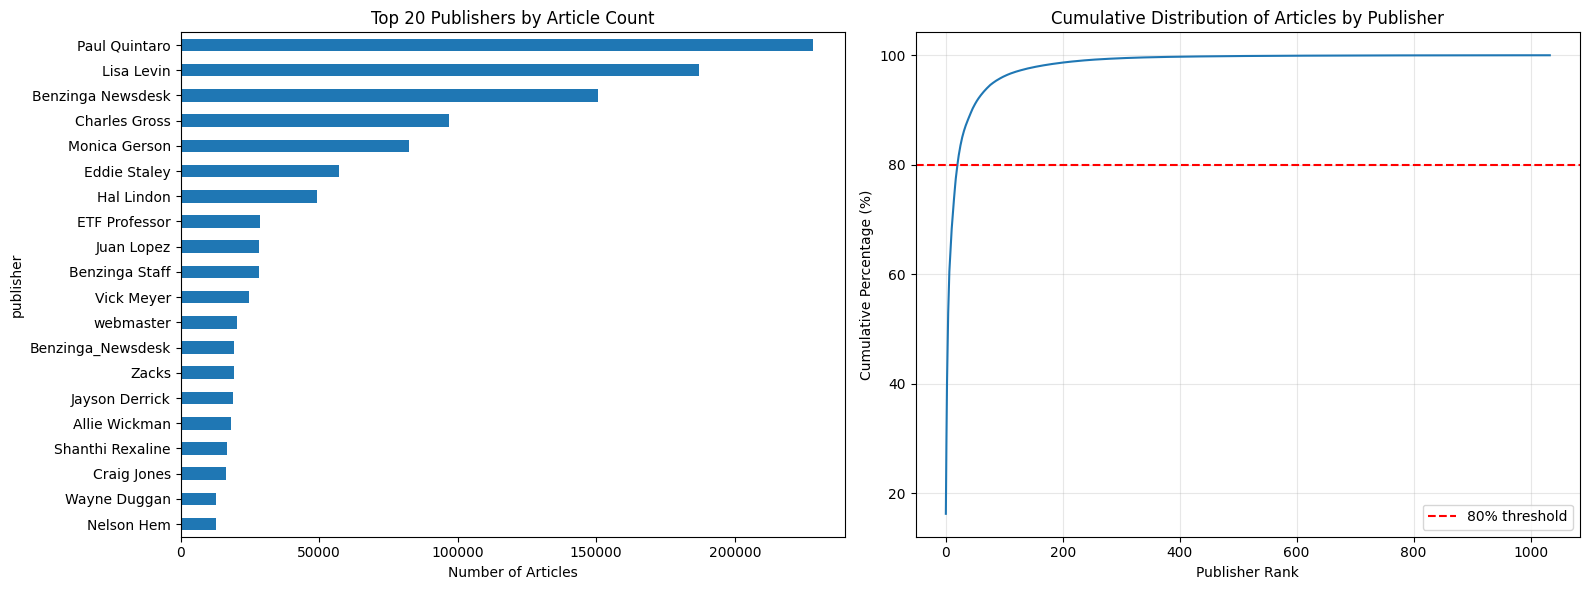

In [42]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Bar chart of top publishers
top_publishers.plot(kind='barh', ax=axes[0])
axes[0].set_title('Top 20 Publishers by Article Count')
axes[0].set_xlabel('Number of Articles')
axes[0].invert_yaxis()

# Cumulative distribution
cumulative_pct = (publisher_counts.cumsum() / publisher_counts.sum() * 100)
axes[1].plot(range(len(cumulative_pct)), cumulative_pct)
axes[1].set_title('Cumulative Distribution of Articles by Publisher')
axes[1].set_xlabel('Publisher Rank')
axes[1].set_ylabel('Cumulative Percentage (%)')
axes[1].axhline(y=80, color='r', linestyle='--', label='80% threshold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
# Statistics
print(f"\nTotal unique publishers: {df['publisher'].nunique()}")
print(f"Publishers with >1000 articles: {(publisher_counts > 1000).sum()}")
print(f"Publishers with >100 articles: {(publisher_counts > 100).sum()}")
print(f"Publishers with only 1 article: {(publisher_counts == 1).sum()}")


Total unique publishers: 1034
Publishers with >1000 articles: 85
Publishers with >100 articles: 253
Publishers with only 1 article: 161


In [44]:
# **Key Questions to Answer:**
# - Which publishers dominate the news feed?
# - Is there a long-tail distribution (few publishers with many articles, many with few)?
# - What percentage of articles come from the top 10 publishers?
# Which publishers dominate the news feed?
dominant_publishers = top_publishers
print("\nThe publishers that dominate the news feed (top 20 by article count):")
print(dominant_publishers)

# Is there a long-tail distribution?
long_tail = (publisher_counts > 100).sum()
very_high = (publisher_counts > 1000).sum()
only_once = (publisher_counts == 1).sum()
total_publishers = publisher_counts.shape[0]
print(f"\nThere is a clear long-tail distribution:")
print(f"- {very_high} publishers with >1000 articles")
print(f"- {long_tail} publishers with >100 articles")
print(f"- {only_once} publishers with only one article")
print(f"- Total unique publishers: {total_publishers}")

# What percentage of articles come from the top 10 publishers?
articles_top10 = publisher_counts.head(10).sum()
total_articles = publisher_counts.sum()
percent_top10 = (articles_top10 / total_articles) * 100
print(f"\nPercentage of articles from top 10 publishers: {percent_top10:.2f}%")



The publishers that dominate the news feed (top 20 by article count):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

There is a clear long-tail distribution:
- 85 publishers with >1000 articles
- 253 publishers with >100 articles
- 161 publishers with only one article
- Total unique publishers: 1034

Percentage of articles from top 10 publishers: 66.53%


### 1.3 Publication Date Trends

**Objective:** Analyze publication dates to identify trends over time.

In [ ]:
 # Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract temporal features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['date_only'] = df['date'].dt.date

# Articles per year
articles_per_year = df.groupby('year').size()
print("Articles per Year:")
print(articles_per_year)

# Articles per month (across all years)
articles_per_month = df.groupby('month').size()
print("\nArticles per Month (Average):")
print(articles_per_month)
# The error message indicates that there was an issue parsing the 'date' column to datetime,
# likely due to inconsistent or malformed date formats (e.g., missing timezone information).
# To clean up the file and improve data quality for later use, let's:
# 1. Try to parse the 'date' column robustly and identify outliers.
# 2. Remove rows with unparseable or obviously incorrect dates (e.g., missing/NaT, or impossible dates).
# 3. Optionally, save the cleaned dataframe to a new file for downstream tasks.

import numpy as np

# Attempt to parse 'date' robustly; errors='coerce' will turn failures into NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# (1) Remove rows where 'date' could not be parsed (outliers or missing)
num_before = len(df)
df = df.dropna(subset=['date'])
num_after = len(df)
print(f"Removed {num_before - num_after} rows with unparseable or missing dates.")

# (2) Detect and remove date outliers, e.g., years that are far outside expected range.
# Below, let's assume news articles should be from 2000 to this year (+1 buffer).
min_year = 2000
max_year = pd.Timestamp.now(tz='UTC').year + 1
df['year'] = df['date'].dt.year
outlier_mask = (df['year'] < min_year) | (df['year'] > max_year)
num_outliers = outlier_mask.sum()
if num_outliers > 0:
    print(f"Removing {num_outliers} rows with outlier years in 'date'.")
    df = df.loc[~outlier_mask]

# (Optional) Drop helper 'year' column if not needed now
df = df.drop(columns=['year'])

# (3) Save cleaned df to disk for future use if desired (uncomment if wanted)
# df.to_csv("cleaned_articles_data.csv", index=False)

# Print basic info after cleanup
print("Data cleanup complete. Remaining rows:", len(df))



ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.